In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

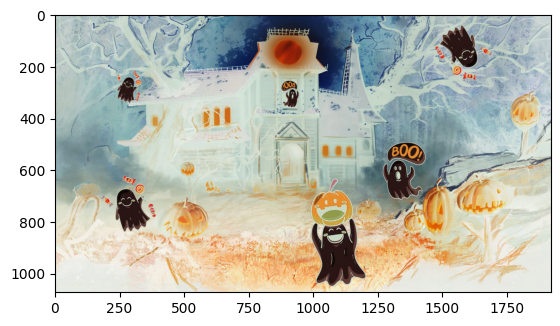

In [2]:
LANDSCAPE = cv2.imread('./хэллоуинский переполох/lab7.png')
LANDSCAPE = cv2.bitwise_not(LANDSCAPE)
plt.imshow(LANDSCAPE)

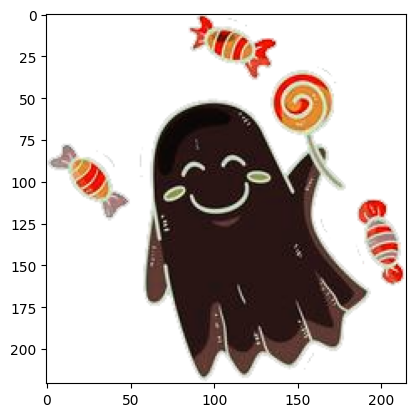

In [3]:
GHOSTS = [cv2.bitwise_not(cv2.imread(f'./хэллоуинский переполох/{i}.png')) for i in ["candy_ghost", "scary_ghost", "pampkin_ghost"]]
plt.imshow(GHOSTS[0])

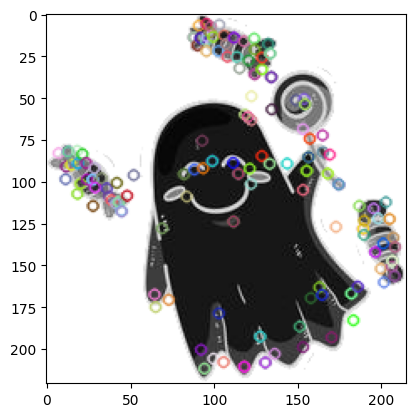

In [4]:
gray = cv2.cvtColor(GHOSTS[0], cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

result = GHOSTS[0].copy()
result = cv2.drawKeypoints(gray, kp, result)

plt.imshow(result, cmap='gray')
plt.show()

OK


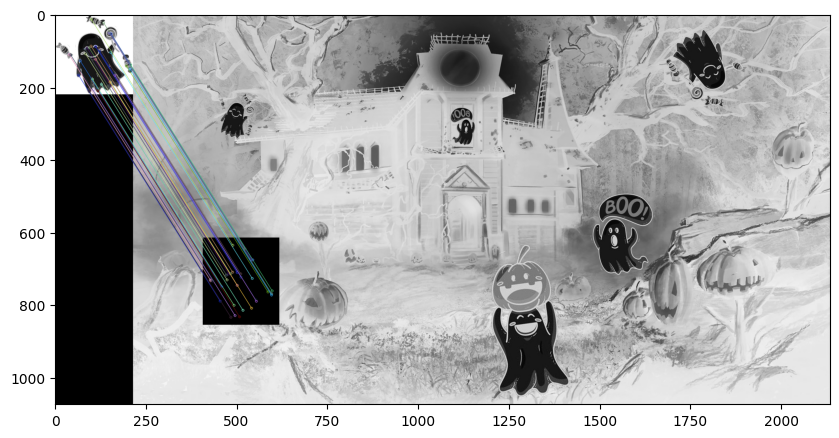

OK


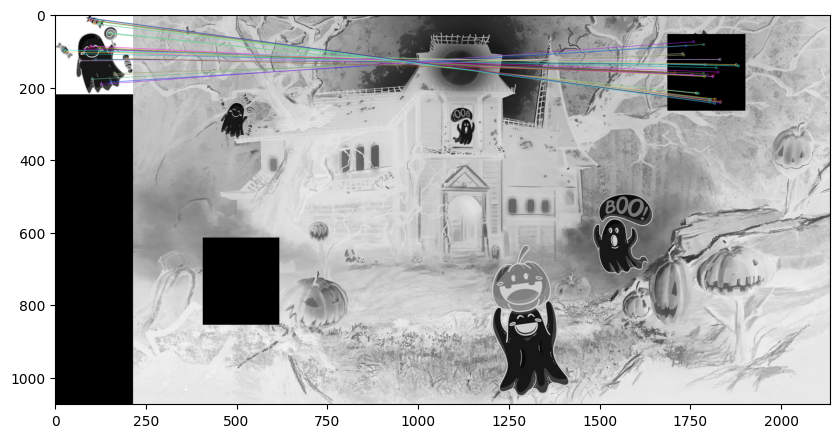

OK


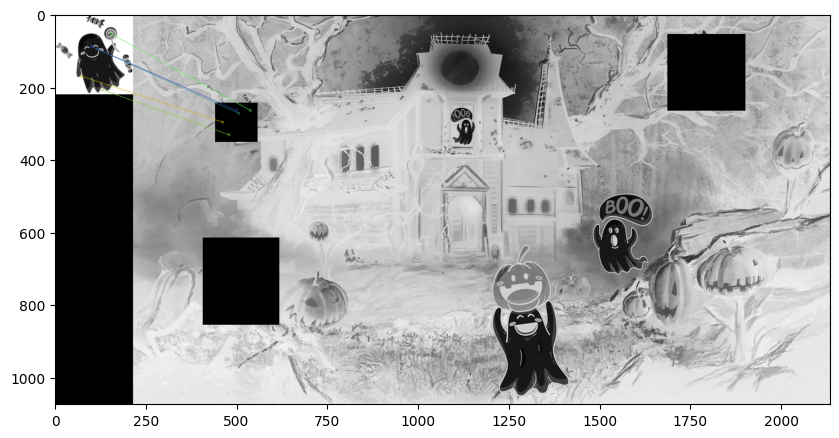

OK


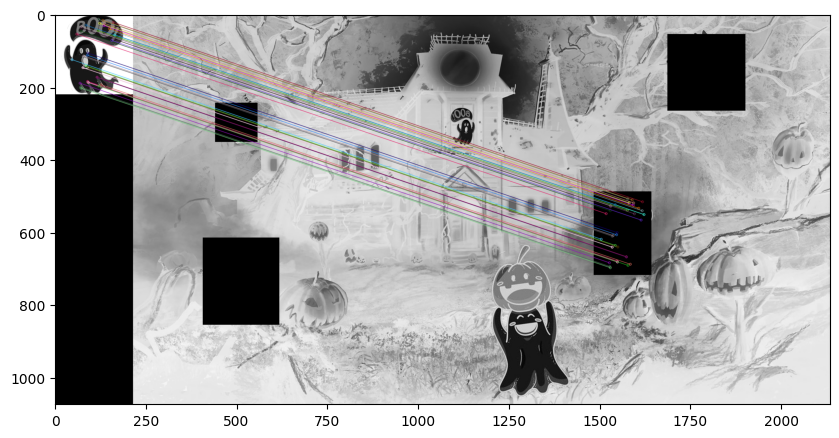

OK


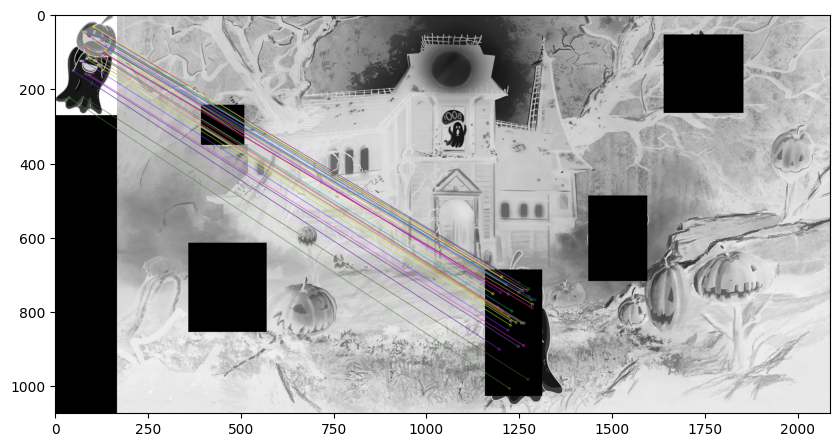

OK


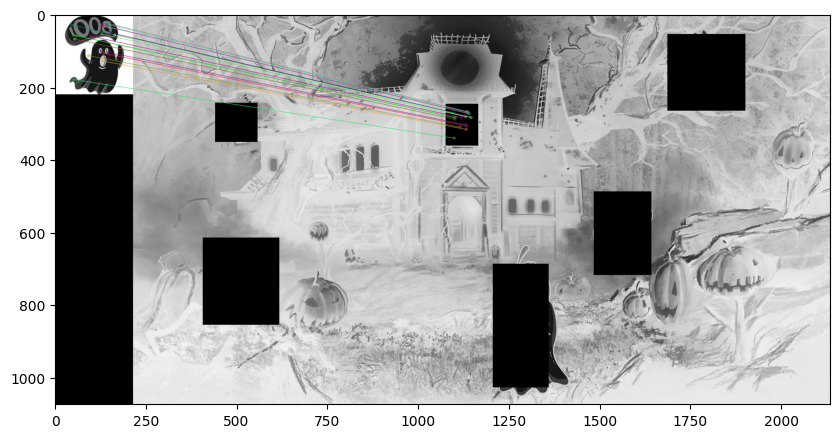

In [5]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

LANDSCAPE_gr = cv2.cvtColor(LANDSCAPE, cv2.COLOR_BGR2GRAY)
GHOSTS_gr = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in GHOSTS + [cv2.flip(i, 1) for i in GHOSTS]]
i = 0

while i < 6:
    keypoints_1, descriptors_1 = sift.detectAndCompute(GHOSTS_gr[i], None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(LANDSCAPE_gr, None)
    
    matches = bf.knnMatch(descriptors_1, descriptors_2, k=2)
    
    good_matches = []
    for m, n in matches:
        if m.distance < 0.5 * n.distance:
            good_matches.append(m)

    # good_matches = matches
    good_matches = sorted(good_matches, key=lambda x: x.distance)
    good_matches = good_matches[:40]

    if len(good_matches) > 0:
        points1 = np.float32([keypoints_1[m.queryIdx].pt for m in good_matches])
        points2 = np.float32([keypoints_2[m.trainIdx].pt for m in good_matches])
    
        if len(points1) < 4 or len(points2) < 4:
            break
            
        H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
        good_matches = [m for i, m in enumerate(good_matches) if mask[i]]
    
        x_min, y_min = points2.min(axis=0).astype(int)
        x_max, y_max = points2.max(axis=0).astype(int)
    
        # Если есть достаточное количество совпадений
        
        if len(good_matches) >= 4:
            # Получаем новые координаты для рисования прямоугольника
            points2 = np.float32([keypoints_2[m.trainIdx].pt for m in good_matches])
            x_min, y_min = points2.min(axis=0).astype(int)
            x_max, y_max = points2.max(axis=0).astype(int)
    
            # Рисуем прямоугольник на LANDSCAPE
            cv2.rectangle(LANDSCAPE_gr, (x_min-20, y_min-20), (x_max+20, y_max+20), (0, 255, 0), -1)
            cv2.rectangle(LANDSCAPE, (x_min-20, y_min-20), (x_max+20, y_max+20), (0, 255, 0), 2)
            print("OK")
        else:
            continue
    else:
        i += 1
        continue
    
    img3 = cv2.drawMatches(GHOSTS_gr[i], keypoints_1, LANDSCAPE_gr, keypoints_2, good_matches, None, flags=2)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img3)
    plt.show()

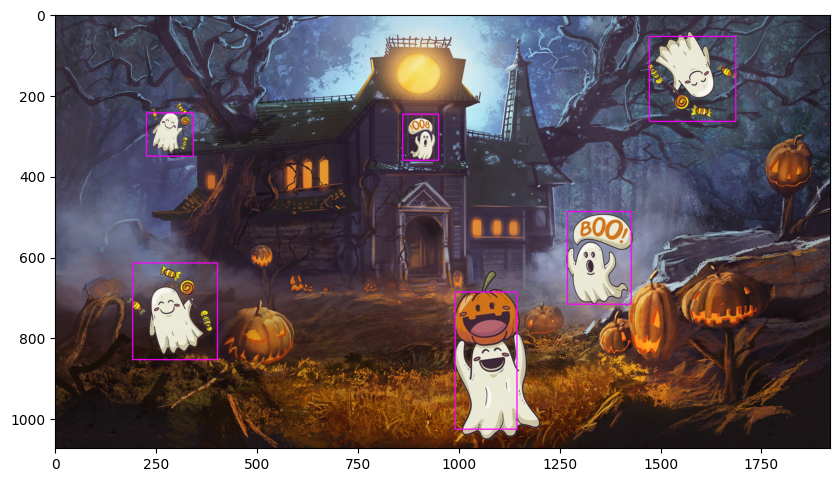

In [6]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(cv2.bitwise_not(LANDSCAPE), cv2.COLOR_BGR2RGB))
plt.show()